# Домашнее задание №3. Линейная регрессия. Расширение признакового пространства. Регуляризация. Валидация

## Ф.И.О: Лукин Денис Владимирович

### Описание.

Домашнее задание состоит из 2-х частей:
  - теоретическая часть
  - практическая часть
    - реализация модуля линейной регрессии
    -  эксперименты

**На проверку требуется отправить zip архив, который будет содержать следующие файлы:**
  - модуль ``modules`` с реализованными классами
  - заполненный блокнот в формате ``.ipynb``
  - заполненный блокнот в формате ``.html`` **(в jupyter: File -> Save and Export Notebook As -> HTML -> ...)**

-------------------------

## Теоретическая часть. (4 points)

**№1.** (2 point) Найдите субдифференциалы для следующих функций:
- $f(x) = \max(0, 1 − ax), \ \ a \ — \ const$,  во всех точках

Найдем точку излома: $1 - ax = 0$.


1 случай: $a = 0$

Функция становится константой:
$$ f(x) = \max(0, 1 - 0 \cdot x) = \max(0, 1) = 1 $$
Производная всегда ноль, следовательно субдифференциал будет:
$$ \partial f(x) = \{0\} $$



2 случай: $a > 0$

Точка излома при $x = \frac{1}{a}$.

*   Если $1 - ax > 0 \implies x < \frac{1}{a}$:
    То есть $f(x) = 1 - ax$. Производная равна:
    $$ f'(x) = -a $$

*   Если $1 - ax < 0 \implies x > \frac{1}{a}$:
    То есть $f(x) = 0$. Производная равна:
    $$ f'(x) = 0 $$

*   В точке излома $x = \frac{1}{a}$:
    Субдифференциал - отрезок, включающий предельные значения производных слева и справа. Поскольку $a > 0$, то $-a < 0$. Субдифференциал равен:
    $$ \partial f\left(\frac{1}{a}\right) = [-a, 0] $$



3 случай: $a < 0$

*   Аналогично в точке излома $x = \frac{1}{a}$:
    Поскольку $a < 0$, то $-a > 0$, получаем, что субдифференциал равен:
    $$ \partial f\left(\frac{1}{a}\right) = [0, -a] $$

Ответ:

Объединив все случаи, субдифференциал равен:

$$
\partial f(x) =
\begin{cases}
\{-a\} & \text{если } x < \frac{1}{a} \\
\{0\} & \text{если } x > \frac{1}{a} \\
[\min(-a, 0), \max(-a, 0)] & \text{если } x = \frac{1}{a}
\end{cases}
$$


- $f(x) = \sin x, \ x \in [0; \frac{3}{2} \pi]$

У функции нет изломов и точек, в которых производная не существует.
Тогда субдифференциал в каждой точке состоит из одного элемента — значения производной в этой точке.

Найдем производную функции $f(x) = \sin x$:
$$ f'(x) = \cos x $$

То есть в любой точке $x$ из отрезка $\left[0; \frac{3}{2}\pi\right]$ субдифференциал функции f(x) представляет собой множество, состоящее из единственного значения, равного $\cos x$.


**№2.** (2 point) Рассмотрим задачу линейной регрессии с регуляризацией:

$$L(w) = \| Xw - y\|_2^2 + \lambda R(w)$$

И попробуем разобраться, в каких случаях возникает случай вырожденного (нулевого решения) для LASSO и Ridge регрессии.

- Покажите, что если оптимальное решение $w^*$ функционала $L(w) = \| Xw - y\|_2^2 + \lambda \|w\|_1$ равно нулю, то выполняется неравенство $\| 2 X^T y \|_{\infty} \le \lambda$.

Функции $L(w)$ - негладкая из-за L1 нормы, а значит, минимум достигается в точке $w^*$, для которой ноль принадлежит субдифференциалу: $0 \in \partial L(w^*)$.

Субдифференциал в точке $w^* = 0$:  
    Градиент гладкой функции $\|Xw - y\|_2^2$ в точке $w=0$ равен $2X^T(X \cdot 0 - y) = -2X^Ty$.  
    Субдифференциал негладкой функции $\lambda\|w\|_1$ в точке $w=0$ — это множество $\lambda\mathbf{s}$,  где каждое $s_i$ принадлежит отрезку $[-1, 1]$, так как слева произваодная -1, а справа 1.

Подставляем $w^* = 0$:
    $$
    0 \in \{-2X^Ty + \lambda\mathbf{s}\}
    $$
    Это означает, что должен существовать такой вектор $\mathbf{s}$ (где $|s_i| \le 1$), что выполнено:
    $$
    2X^Ty = \lambda\mathbf{s}
    $$
    $$
    s_i = \frac{2(X^Ty)_i}{\lambda}
    $$
    $$
    \left| \frac{2(X^Ty)_i}{\lambda} \right| \le 1 \implies |2(X^Ty)_i| \le \lambda
    $$
    $$
    \max_i |2(X^Ty)_i| \le \lambda \quad \iff \quad \|2X^Ty\|_\infty \le \lambda
    $$

- Покажите, что для функционала $L(w) = \| Xw - y\|_2^2 + \lambda \| w \|_2^2$ при $X^Ty \neq 0$ не существует $\lambda$ такого, что оптимальное решение $w^*$ обращается в нуль. 

Функция $L(w)$ является гладкой везде, поэтому стоит просто приравнять к 0 грдиент.  
$$
\nabla L(w) = \nabla(\|Xw - y\|_2^2) + \nabla(\lambda\|w\|_2^2)
$$
$$
\nabla L(w) = 2X^T(Xw - y) + 2\lambda w
$$

Пдставим $w^* = 0$:
    $$
    \nabla L(0) = 2X^T(X \cdot 0 - y) + 2\lambda \cdot 0 = -2X^Ty = 0
    $$
$$
-2X^Ty = 0 \quad \iff \quad X^Ty = 0
$$
Противоречие с тем, что $X^Ty \ne 0$.
То есть точка $w=0$ не может быть точкой минимума.


------------------------

## Практическая часть. (16 points)

Данная часть задания направлена на ознакомление с линейными моделями и градиентными методами обучения. В задании необходимо:
1. Написать на языке Python собственную реализацию модели линейной регрессии с произвольной функцией потерь и реализацию функции и градиента функции потерь для линейной регрессии. Реализации можно частично проверить через юнит-тесты (запускаются командой ``pytest tests.py``).
2. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом.
3. Написать отчёт о проделанной работе (в формате jupyter notebook).

### Реализация алгоритмов. (3 points)

Везде под выборкой объектов будем понимать ``numpy.ndarray`` размера $N \times D$ или разреженную матрицу ``scipy.sparse.csr_matrix`` того же размера, под ответами для объектов выборки будем понимать ``numpy.ndarray`` размера $N$ , где $N$ — количество объектов в выборке, $D$ — размер признакового пространства. Подразумевается, что первый столбец выборки объектов соответствует признаку для смещения и равен единице.

- **``losses.py``** (1 point)
  - класс в этом модуле задаёт конкретную функцию потерь, которую можно использовать для обучения линейной модели. Обратите внимание на то, что подсчёт всех функций может быть полностью векторизован (т.е. их можно реализовать без циклов). Предложенная в задании функция потерь должна поддерживать использование $l2$-регуляризации. Обратите внимание, что признак для смещения **не** должен учитываться в регуляризаторе.
  - Класс должен поддерживать как плотные матрицы (``numpy.ndarray``), так и разреженные матрицы (``scipy.sparse.csr_matrix``). Класс ``LinearLoss`` наследуется от абстрактного класса BaseLoss и реализует два метода: ``func`` и ``grad``.
    - ``func(self, X, y, w)`` — вычисление значения функции потерь на матрице признаков $X$, векторе ответов $y$ с вектором весов $w$.
    - ``grad(self, X, y, w)`` — вычисление значения градиента функции потерь на матрице признаков $X$, векторе ответов $y$ с вектором весов $w$.
  - У обоих методов одинаковые аргументы:
     - $X$ - выборка объектов
     - $y$ - вектор ответов
     - $w$ - вектор коэффициентов модели ``numpy.ndarray``.

В данном задании предлагается реализовать следующую функцию потерь:

$$L(X,y,w, \lambda) = \frac{1}{N} \| Xw - y \|_2^2 + \lambda \|w\|_2^2$$

- **``linear_model.py``** (2 points)
  - модуль с реализацией линейной модели, поддерживающей обучение через полный и стохастический градиентные спуски. Линейная модель должна задаваться в классе LinearModel. Параметр $\eta_k > 0$ — темп обучения (learning rate) для градиентного спуска, где $k$ — номер эпохи, должен параметризовываться формулой: $\eta_k = \dfrac{\alpha}{k^{\beta}}, \ где \ \ \alpha, \beta \ — \ \ заданные \ константы, \ \ k \ — \ \ номер \ итерации$

  - Описание методов класса:
    - ``__init__`` — конструктор (инициализатор) класса с параметрами:
      - ``loss_function`` — функция потерь, заданная классом, наследованным от ``BaseLoss``
      - ``batch_size`` — размер подвыборки, по которой считается градиент, если ``None``, то необходимо использовать полный градиент
      - ``step_alpha`` — параметр выбора шага градиентного спуска
      - ``step_beta`` — параметр выбора шага градиентного спуска
      - ``tolerance`` — точность, по достижении которой, необходимо прекратить оптимизацию.
        - **В данном случае в качестве критерия останова требуется реализовать вариант:** $\| w_{current} - w_{previous} \| \le tolerance$
      - ``max_iter`` — максимальное число итераций 
    - ``fit(self, X, y, w_0=None, trace=False)`` — обучение линейной модели:
      - ``X`` - выборка объектов
      - ``y`` - вектор ответов
      - ``w_0`` - начальное приближение вектора весов, если ``None``, то необходимо инициализировать внутри метода
      - ``trace`` - индикатор, нужно ли возвращать информацию об обучении
        - Если ``trace is True``, то метод должен вернуть словарь ``history``, содержащий информацию о поведении метода оптимизации во время обучения. Длина словаря ``history`` — количество эпох. Элементы словаря в случае полного градиентного спуска:
          - ``history[’time’]`` — содержит время, потраченное на обучение каждой эпохи
          - ``history[’func’]`` — содержит значения функционала на обучающей выборке на каждой эпохе
          - ``history[’func_val’]`` — содержит значения функционала на валидационной выборке на каждой эпохе
        - Обратите внимание, что ``trace is True`` сильно замедляет обучение методов, т.к. требует в конце эпохи подсчитывать значение функции. Не используйте его ни в каких экспериментах, кроме экспериментов, где необходимо исследовать поведение функции в зависимости от гиперпараметров.
        - Нет необходимости проводить честное семплирование для каждого батча в методе стохастического градиентного спуска. Вместо этого предлагается в начале одной эпохи сгенерировать случайную перестановку индексов объектов, а затем последовательно выбирать объекты для нового батча из элементов этой перестановки.
    - ``predict(self, X)`` — получение предсказаний модели
      - ``X`` - выборка объектов
      - $\rightarrow$ Метод должен вернуть ``numpy.ndarray`` такого же размера, как и первая размерность матрицы ``X``.
    - ``get_objective(self, X, y)`` — вычисление значения функции потерь
      - ``X`` - выборка объектов
      - ``y`` - вектор ответов
      - $\rightarrow$ Функция должна вернуть вещественное число.
    - ``get_weights(self)`` — получить вектор линейных коэффициентов модели

--------------------------

### Эксперименты. (13 points)

Данные для этого задания находятся в файле ``hw3_data.csv``. Данные состоят из двух колонок: ``text`` и ``y``. Текст представляет собой комментарии пользователей. А целевая переменная, колонка ``y``, отражает степень токсичности комментария, которую вам необходимо будет предсказать.

**1.** (2 points)

*1.1* Произведите предварительную обработку текста. Приведите все тексты к нижнему регистру. Замените в тексте все символы, не являющиеся буквами и цифрами, на пробелы. Примените алгоритм [лемматизации](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F) (например, [WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnet) из библиотеки [nltk](https://www.nltk.org/index.html)) к коллекции. Удалите из текста стоп-слова (например, используя список стоп-слов из nltk).

Замечание. Полезные функции: ``str.lower``, ``str.split``, ``str.isalnum``, ``re.sub``, ``re.split``.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def preprocessing_text(line):
  line = line.lower()
  line = re.sub(r'[^a-z0-9]+', ' ', line)

  words = line.split()

  eng_stopwords = stopwords.words('english')
  filtered_words = [word for word in words if word not in eng_stopwords]

  lemmatizer = WordNetLemmatizer()
  filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]

  filtered_line = ''

  for word in filtered_words:
    filtered_line += str(word) + ' '

  return filtered_line.strip()

data = pd.read_csv('hw3_data.csv')
data['text'] = data['text'].apply(preprocessing_text)
data

text         y
0      oh dear johnny boy part one want fucking fight...  2.076477
1                                     savant13 fat shite  3.580757
2                          english want get blocked fu k  0.805528
3                     fuck care g e r f l l p l e e j ck  4.582293
4      yo dear sir james paul fruity as nigga get lif...  2.077456
...                                                  ...       ...
47986  bullshit anon quarter civilian troop area viol...  1.004520
47987                q 10 okay jesus call bastard course  1.013754
47988                                fucking bitch bitch  0.998662
47989                                         life bitch  1.004691
47990  hi hi muthafuckaa man wanted wish happy year n...  0.999724

[47991 rows x 2 columns]

*1.2.* Разделите данные на обучение, валидацию и тест. Для теста выберете $30\%$ __случайных__ объектов из датасета. Оставшиеся данные разбейте в соотношении $70/30$ (обучение/валидация). Рекомендуется использовать функцию ``sklearn.model_selection.train_test_split`` c параметром ``random_state=42``.

In [2]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.3, random_state=42)
train, val = train_test_split(train_val, train_size=0.7,random_state=42)

*1.3.* Преобразуйте текст в разреженную матрицу ``scipy.sparse.csr_matrix``, где значение $x$ в позиции $(i, j)$ сответствует [$tf-idf$](https://ru.wikipedia.org/wiki/TF-IDF) характеристке $j$-го слова в $i$-ом документе. Рекомендуется использовать конструктор [``sklearn.feature_extraction.text.TfidfVectorizer``](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Добавьте в данные единичный столбец на нулевой позиции.

Замечание 1. У ``TfidfVectorizer`` есть несколько методов для работы, используйте ``fit_transform`` и ``fit`` для обучающей выборки, используйте ``transform`` для тестовой.

Замечание 2. Используйте параметр ``min_df``, чтобы уменьшить размерность данных и ускорить проведение экспериментов. Рекомендуется использовать ``min_df`` не меньше 5.

Замечание 3. Для добавления единичного столбца, можно воспользоваться следующей инструкцией: ``from scipy.sparse import hstack, csr_matrix
X = csr_matrix(hstack([csr_matrix(np.ones((X.shape[0], 1))), X]))``

In [23]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer = TfidfVectorizer(min_df=5)

X_train = vectorizer.fit_transform(train['text'])
X_val = vectorizer.transform(val['text'])
X_test = vectorizer.transform(test['text'])

X_train_with_bias = csr_matrix(hstack([csr_matrix(np.ones((X_train.shape[0], 1))), X_train]))
X_val_with_bias = csr_matrix(hstack([csr_matrix(np.ones((X_val.shape[0], 1))), X_val]))
X_test_with_bias = csr_matrix(hstack([csr_matrix(np.ones((X_test.shape[0], 1))), X_test]))

print(X_train_with_bias)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 521758 stored elements and shape (23515, 10405)>
  Coords	Values
  (0, 0)	1.0
  (0, 2076)	0.09822044859588036
  (0, 5756)	0.20179410835439837
  (0, 7970)	0.16832119821777689
  (0, 7794)	0.2671491879822428
  (0, 7131)	0.11460632617008919
  (0, 8536)	0.1960863593024166
  (0, 2886)	0.2443092040696342
  (0, 5126)	0.2239184985180184
  (0, 7338)	0.16137494175943243
  (0, 1047)	0.14928342160249092
  (0, 5627)	0.16261344916579507
  (0, 5849)	0.36131077954286106
  (0, 6625)	0.19254653034907876
  (0, 9193)	0.13986186527873745
  (0, 5836)	0.10355877508874582
  (0, 7878)	0.1671431303942339
  (0, 2820)	0.17473676077002734
  (0, 899)	0.20226926574730278
  (0, 2407)	0.15647481316865916
  (0, 819)	0.2034599826824773
  (0, 10235)	0.17751517886317741
  (0, 9993)	0.20928298541738954
  (0, 3250)	0.17272346173243397
  (0, 10210)	0.07121305214477251
  :	:
  (23514, 7856)	0.05413470193997695
  (23514, 8014)	0.1284880737124099
  (23514, 3158)	0.065

**2.** (3 points) В спецификации предлагается использовать следующую формулу для выбора темпа обучения $\gamma_k$:

$$\gamma_k = \dfrac{\alpha}{k^{\beta}}, \ где \ \ \alpha, \beta \ — \ заданные \ константы, \ \ k \ — \ номер \ итерации$$

   - Исследуйте поведение градиентного спуска для задачи линейной регрессии в зависимости от следующих параметров:
        - параметр темпа обучения ``step_alpha``
        - параметр темпа обучения ``step_beta``

   - Исследование поведения подразумевает анализ следующих зависимостей на обучающей и валидационной выборках:
        - зависимость значения функции потерь от реального времени работы метода
        - зависимость значения функции потерь от эпохи метода
        - значение метрики качества после обучения метода

В качестве метрики качества здесь и далее предлагается использовать **MAE**.

***Дисклеймер:*** *это исследовательская часть задания, где вы сами решаете, как много экспериментов проводить, как ограничить пространство поиска и прочие параметры. Оценка качества экспериментов будет основана на субъективных ощущениях проверяющего. Таким образом моделируется реальное исследование, когда вы в большинстве случаев не можете оценить, в какой области находится достаточно хорошее решение и сколько потребуется экспериментов для его достижения.*

In [28]:
from modules.linear_model import LinearModel
from modules.losses import LinearLoss
from sklearn.metrics import mean_absolute_error

res = {}

alpha_list = np.linspace(0, 1, 6)
betta_list = np.linspace(0, 1, 6)

for alpha in alpha_list:
  for betta in betta_list:
    loss = LinearLoss(l2_coef=0.5)
    model = LinearModel(loss, step_alpha=alpha, step_beta=betta)

    history = model.fit(X_train_with_bias, train['y'].values, None, trace=True, X_val=X_val_with_bias, y_val=val['y'].values)

    y_pred = model.predict(X_val_with_bias)
    mae = mean_absolute_error(val['y'], y_pred)
    history['mae'] = mae
    res[(alpha, betta)] = history

print(res.items())

dict_items([((np.float64(0.0), np.float64(0.0)), {'time': [0.009999513626098633], 'func': [np.float64(1.520821232730046)], 'func_val': [np.float64(1.5675452284591262)], 'mae': 0.8526355747582665}), ((np.float64(0.0), np.float64(0.2)), {'time': [0.008999347686767578], 'func': [np.float64(1.520821232730046)], 'func_val': [np.float64(1.5675452284591262)], 'mae': 0.8526355747582665}), ((np.float64(0.0), np.float64(0.4)), {'time': [0.00800013542175293], 'func': [np.float64(1.520821232730046)], 'func_val': [np.float64(1.5675452284591262)], 'mae': 0.8526355747582665}), ((np.float64(0.0), np.float64(0.6000000000000001)), {'time': [0.008243560791015625], 'func': [np.float64(1.520821232730046)], 'func_val': [np.float64(1.5675452284591262)], 'mae': 0.8526355747582665}), ((np.float64(0.0), np.float64(0.8)), {'time': [0.011077404022216797], 'func': [np.float64(1.520821232730046)], 'func_val': [np.float64(1.5675452284591262)], 'mae': 0.8526355747582665}), ((np.float64(0.0), np.float64(1.0)), {'time'

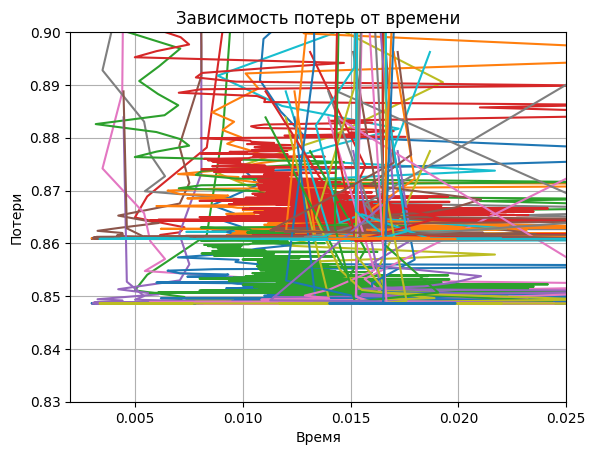

In [56]:
import matplotlib.pyplot as plt

for alpha_betta, history in res.items():
  plt.plot(history['time'], history['func'], label=f'(a={alpha_betta[0]}, b={alpha_betta[1]})')
  plt.plot(history['time'], history['func_val'], label=f'(a={alpha_betta[0]}, b={alpha_betta[1]})')

plt.title('Зависимость потерь от времени')
plt.xlabel('Время')
plt.ylabel('Потери')

plt.ylim(0.83, 0.9)
plt.xlim(0.002, 0.025)

# plt.legend()
plt.grid(True)
plt.show()

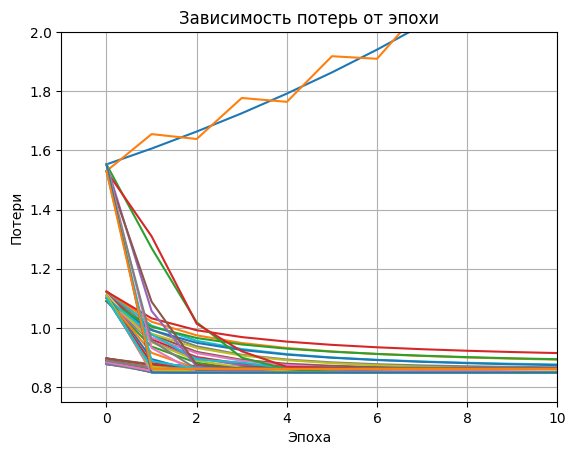

In [72]:
for alpha_betta, history in res.items():
  plt.plot(history['func'], label=f'(a={alpha_betta[0]}, b={alpha_betta[1]})')
  plt.plot(history['func_val'], label=f'(a={alpha_betta[0]}, b={alpha_betta[1]})')

plt.title('Зависимость потерь от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Потери')

plt.ylim(0.75, 2)
plt.xlim(-1, 10)
# plt.legend()
plt.grid(True)
plt.show()

In [81]:
sorted_res = sorted(res.items(), key=lambda x: x[1]['mae'])
for alpha_betta, history in sorted_res[:5]:
  alpha = alpha_betta[0]
  betta = alpha_betta[1]
  mae = history['mae']
  print(f'({alpha}, {betta}): MAE = {mae}')

(0.2, 1.0): MAE = 0.5760002781040694
(0.2, 0.8): MAE = 0.5810557104054371
(0.4, 1.0): MAE = 0.5811857478653214
(1.0, 1.0): MAE = 0.5812934529143691
(1.0, 0.8): MAE = 0.5813025978117123


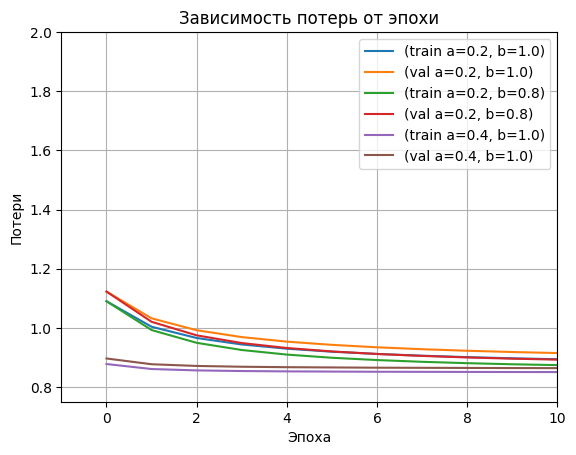

In [86]:
for alpha_betta, history in sorted_res[:3]:
  plt.plot(history['func'], label=f'(train a={alpha_betta[0]}, b={alpha_betta[1]})')
  plt.plot(history['func_val'], label=f'(val a={alpha_betta[0]}, b={alpha_betta[1]})')

plt.title('Зависимость потерь от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Потери')

plt.ylim(0.75, 2)
plt.xlim(-1, 10)
plt.legend()
plt.grid(True)
plt.show()

**5.** (3 points)
- Исследуйте поведение стохастического градиентного спуска для задачи линейной регрессии в зависимости от следующих параметров:
  - параметр темпа обучения ``step_alpha``
  - параметр темпа обучения ``step_beta``
  - размер подвыборки ``batch_size``

Замечание. Обратите внимание, что в стохастическом случае необходимо строить зависимости метрик качества от эпохи метода. За одну эпоху через оптимизацию модели проходит $N$ объектов, где $N$ — длина обучающей выборки. Если вы реализуете семплирование согласно спецификации задания, то за одну эпоху каждый объект пройдёт через оптимизацию ровно один раз. В полном градиентном спуске одна эпоха метода соответствует одной итерации обучения.

***Дисклеймер:*** *это исследовательская часть задания, где вы сами решаете, как много экспериментов проводить, как ограничить пространство поиска и прочие параметры. Оценка качества экспериментов будет основана на субъективных ощущениях проверяющего. Таким образом моделируется реальное исследование, когда вы в большинстве случаев не можете оценить, в какой области находится достаточно хорошее решение и сколько потребуется экспериментов для его достижения.*

In [97]:
from modules.linear_model import LinearModel
from modules.losses import LinearLoss
from sklearn.metrics import mean_absolute_error

res = {}

alpha_list = np.linspace(0.05, 0.95, 3)
betta_list = np.linspace(0.05, 0.95, 3)
batch_list = np.linspace(1, 200, 3).astype(int)

for batch_size in batch_list:
  for alpha in alpha_list:
    for betta in betta_list:
      loss = LinearLoss(l2_coef=0.1)
      model = LinearModel(loss, batch_size=batch_size, step_alpha=alpha, step_beta=betta, max_iter=10)

      history = model.fit(X_train_with_bias, train['y'].values, None, trace=True, X_val=X_val_with_bias, y_val=val['y'].values)

      y_pred = model.predict(X_val_with_bias)
      mae = mean_absolute_error(val['y'], y_pred)
      history['mae'] = mae

      res[(batch_size, alpha, betta)] = history

In [101]:
sorted_res = sorted(res.items(), key=lambda x: x[1]['mae'])
for alpha_betta, history in sorted_res[:5]:
  batch_size = alpha_betta[0]
  alpha = alpha_betta[1]
  betta = alpha_betta[2]
  mae = history['mae']
  print(f'({batch_size}, {alpha}, {betta}): MAE = {mae}')

(200, 0.95, 0.05): MAE = 0.5413592049458192
(200, 0.05, 0.95): MAE = 0.5667004274641425
(100, 0.05, 0.95): MAE = 0.5668384903100121
(200, 0.05, 0.49999999999999994): MAE = 0.5672023078105158
(100, 0.05, 0.49999999999999994): MAE = 0.5686124913434095


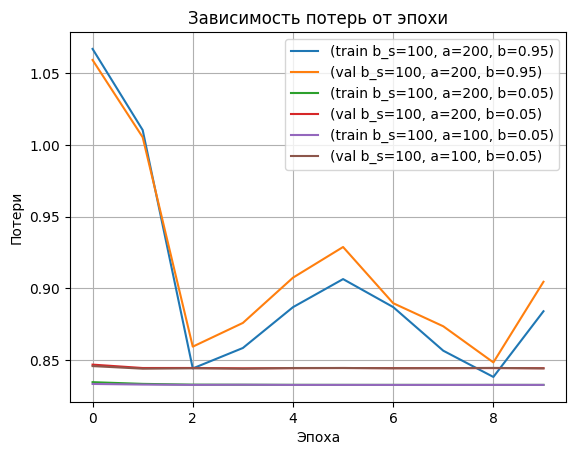

In [103]:
for alpha_betta, history in sorted_res[:3]:
  plt.plot(history['func'], label=f'(train b_s={batch_size}, a={alpha_betta[0]}, b={alpha_betta[1]})')
  plt.plot(history['func_val'], label=f'(val b_s={batch_size}, a={alpha_betta[0]}, b={alpha_betta[1]})')

plt.title('Зависимость потерь от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Потери')

# plt.ylim(0.75, 2)
# plt.xlim(-1, 10)
plt.legend()
plt.grid(True)
plt.show()

**6.** (2 point) Сравните поведение двух методов между собой, сделайте выводы. Сравните оптимальные ``step_alpha`` и ``step_beta`` для разных методов.

**7.** (1 point) Подберите по отложенной выборке коэффициент $l2$-регуляризации модели.

**8.** (2 points) Выберите лучший алгоритм для тестовой выборки. Проанализируйте ошибки алгоритма. Проанализируйте и укажите общие черты объектов, на которых были допущены ошибки.